In [1]:
import pandas as pd 
import numpy as np 
from numpy.linalg import norm
from scipy.spatial.distance import pdist,squareform

def cosine_similarities(a,b) : 
    norm_a = np.sqrt(np.dot(a,a))
    norm_b = np.sqrt(np.dot(b,b))
    cosine_similarities = np.dot(a,b) / np.dot(norm_a,norm_b)
    return cosine_similarities

c:\Users\Fakhri Robi Aulia\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Fakhri Robi Aulia\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Fakhri Robi Aulia\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Fakhri Robi Aulia\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\Users\Fakhri Robi Aulia\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\Fakhri Robi Aulia\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 i

## Dimensionality Reduction Method & Neighbourhood Method

Dimensionality Reduction is extension of neighbourhood methods , Problem with neighbourhood collaborative filtering is they are sparse-> to tackle the issue the dimensionality is the solution providing another lower representasion.

There are two types of Dimensionality Reduction : 
1. Row Wise (User) Latent Factor or Column Wise (Item) Latent Factor 
2. Utilizing Both Simultaneously


In this Notebook We are going to Cover only the first one. 


How to do that 
1. Given User Rating Metrics R with m user and n items (mxn) -> We are going to use PCA to create URM R' with size of (mxd), d<=n

## Dimensionality Reduction Method using SVD

In [86]:
#Implementation 
# Create User Rating Matrix R
m = 50 
n = 50  
max_rating = 5 
R =  np.random.randint(max_rating,size=(m,n))

#replacing zero with np.NaN
R = np.where(R==0, np.nan, R)
#however the PCA needs non missing value matrix 

#handling missing values 
R_transpose = R.T
for col in range(n) : 
   mean = np.nanmean(R_transpose[col])
   R_transpose[col][np.isnan(R_transpose[col])] = mean

#transpose back 
R = R_transpose.T
similarity = squareform(pdist(R, metric='cosine'))

from sklearn.decomposition import TruncatedSVD 

svd = TruncatedSVD(n_components=30)

new_similarity_matrix = svd.fit_transform(similarity)

#this reduction is used to find the peer of user 


#now we want to infer what is the rating of user 1 on item 3 given 5 closest
n_closest = 5 
closest_5_peers = new_similarity_matrix[0].argsort()[-n_closest:][::-1]


item_to_predict=2
#calculate based on weighting 
total_similarities = 0 
ratings= 0 
for idx in closest_5_peers : 
    user_u = R[0]
    user_v = R[idx]
    similarities_u_v = cosine_similarities(user_u,user_v)
    total_similarities+=similarities_u_v
    #get user_v average ratings 
    user_v_avg_rating = np.mean(user_v)
    
    #get user_v ratings on item_to_predict 
    r_v_item = user_v[item_to_predict]
    
    #substract mean from user_v rating on item to predict 
    r_user_v_adjusted = (r_v_item - user_v_avg_rating)
    
    ratings +=  similarities_u_v * r_user_v_adjusted
user_u = R[0]
user_u_avg_rating = np.mean(user_u)
ratings/=total_similarities
ratings+=user_u_avg_rating

print(f'User 1 Ratings on Item 10, Predicted :{ratings}, Actual {R[0][item_to_predict]}')

User 1 Ratings on Item 10, Predicted :2.806435084989861, Actual 4.0


## Dimentionality Reduction using PCA 

In [87]:
#Implementation 
# Create User Rating Matrix R
m = 50 
n = 50  
max_rating = 5 
R =  np.random.randint(max_rating,size=(m,n))

#replacing zero with np.NaN
R = np.where(R==0, np.nan, R)
#however the PCA needs non missing value matrix 

#handling missing values 
R_transpose = R.T
for col in range(n) : 
   mean = np.nanmean(R_transpose[col])
   R_transpose[col][np.isnan(R_transpose[col])] = mean

#transpose back 
R = R_transpose.T
# similarity = squareform(pdist(R, metric='cosine'))
covariance = np.cov(R)
from sklearn.decomposition import TruncatedSVD,PCA

pca = PCA(n_components=30)

pca_cov = pca.fit_transform(covariance)

#this reduction is used to find the peer of user 


#now we want to infer what is the rating of user 1 on item 3 given 5 closest
n_closest = 5 
closest_5_peers = pca_cov[0].argsort()[-n_closest:][::-1]


item_to_predict=2
#calculate based on weighting 
total_similarities = 0 
ratings= 0 
for idx in closest_5_peers : 
    user_u = R[0]
    user_v = R[idx]
    similarities_u_v = cosine_similarities(user_u,user_v)
    total_similarities+=similarities_u_v
    #get user_v average ratings 
    user_v_avg_rating = np.mean(user_v)
    
    #get user_v ratings on item_to_predict 
    r_v_item = user_v[item_to_predict]
    
    #substract mean from user_v rating on item to predict 
    r_user_v_adjusted = (r_v_item - user_v_avg_rating)
    
    ratings +=  similarities_u_v * r_user_v_adjusted
user_u = R[0]
user_u_avg_rating = np.mean(user_u)
ratings/=total_similarities
ratings+=user_u_avg_rating

print(f'User 1 Ratings on Item 10, Predicted :{ratings}, Actual {R[0][item_to_predict]}')

User 1 Ratings on Item 10, Predicted :1.8678659277730603, Actual 2.0


## Implementing PCA from Scratch 

Objective -> Get New Features that has biggest variance 
Problem -> Maximization 
Cost Function -> 
Constraint -> Sum Squared of Scaling Factor is 1 

Idea -> New Feature or Principal Component is Linear Combinations of feature 
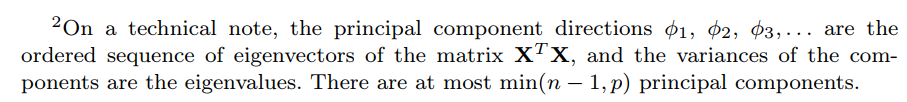

high_dim_data =  np.random.randint(400,size=(m,n))

In [55]:
high_dim_data =  np.random.randint(400,size=(30,50))

high_dim_data = high_dim_data - np.mean(high_dim_data , axis = 0)

#why we create covariance matrix its because this is the best benchmark uniqueness  
cov_mat = np.cov(high_dim_data , rowvar = False)

eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
#Step-5
eigenvector_subset = sorted_eigenvectors[:,0:2]
    
#Step-6
# X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    



In [59]:
len(eigen_values)

50

In [56]:
eigenvector_subset.shape

(50, 2)

In [52]:
high_dim_data.shape 

(50, 50)

In [57]:
#expectation we are going to have 2 features of 50 sample or 
(50,2)
np.dot(high_dim_data,eigenvector_subset)

array([[ -23.47907067, -234.76706237],
       [-116.80720119,   90.37699593],
       [-424.37997179,   35.42506162],
       [-171.13236507,  319.00934532],
       [ -38.80646896, -117.70397092],
       [-306.71196209, -195.81273107],
       [-159.28978797,  279.42417267],
       [-256.85662384,  269.43746154],
       [   3.32759352,  -16.83437788],
       [ 159.89213105,  -98.25910781],
       [  40.01117905,  303.90805073],
       [ 386.72741418, -182.19552858],
       [-250.97571716, -173.64836925],
       [  83.48379774, -596.22189502],
       [ 251.59587958,  -89.61727397],
       [-409.26502051, -314.17115654],
       [ -91.02178256,  165.52938269],
       [ 461.99167453,  -22.86929011],
       [ 260.64588139,  377.2613769 ],
       [-362.78863605,   97.20521178],
       [ 131.9453198 ,  223.11005335],
       [ -20.23698855,  -38.00542181],
       [  44.65981542,  560.60190977],
       [ 298.02158856,  -88.14292287],
       [-154.63733397,  193.84302734],
       [-438.18914173, -2

## Direct Matrix Factorization for Incomplete Data

$$A=UΣV^T$$

$$ U = eigenvector(AA^T)$$

$$ Σ = sqrt(eigval(AA^T))$$

$$ V = eigenvector(A^TA) $$

In [88]:
#Implementation -> Create Dummy Matrix
# Create User Rating Matrix R
m = 50 
n = 50  
max_rating = 5 
R =  np.random.randint(max_rating,size=(m,n))

#replacing zero with np.NaN
R = np.where(R==0, np.nan, R)
#however the PCA needs non missing value matrix 

## Neighbourhood User Regression Model

1. Provide User Rating Matrix 
2. Compute Create Similarity Matrix 
3. Create Weight W with size user x user 
4. For each user u or specified user we will predict 
    get k neighbour, k is hyperparameter 
    create weight regarding number of number of its neigbour 
    fit regression model 
    calculate error 
    optimize 
    set W based on location u and neigbour 
5. For Later Inference -> Call the weight from W multiply by each neigbour rating 
6. 